In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

data= pd.read_csv('data.csv')


In [110]:
#统计描述
print(data.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [131]:
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [111]:
#检测缺失值

data.isnull().any().any()

False

In [112]:
#异常值分析

data_mean = data['Fresh'].mean()
data_std = data['Fresh'].mean()
data_top =data_mean+2*data_std
data_bottom = data_mean-2*data_std
print("是否存在超出正常范围的值：",any(data['Fresh']>data_top))
print("是否存在小于正常范围的值：",any(data['Fresh']<data_bottom))

是否存在超出正常范围的值： True
是否存在小于正常范围的值： False


In [113]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


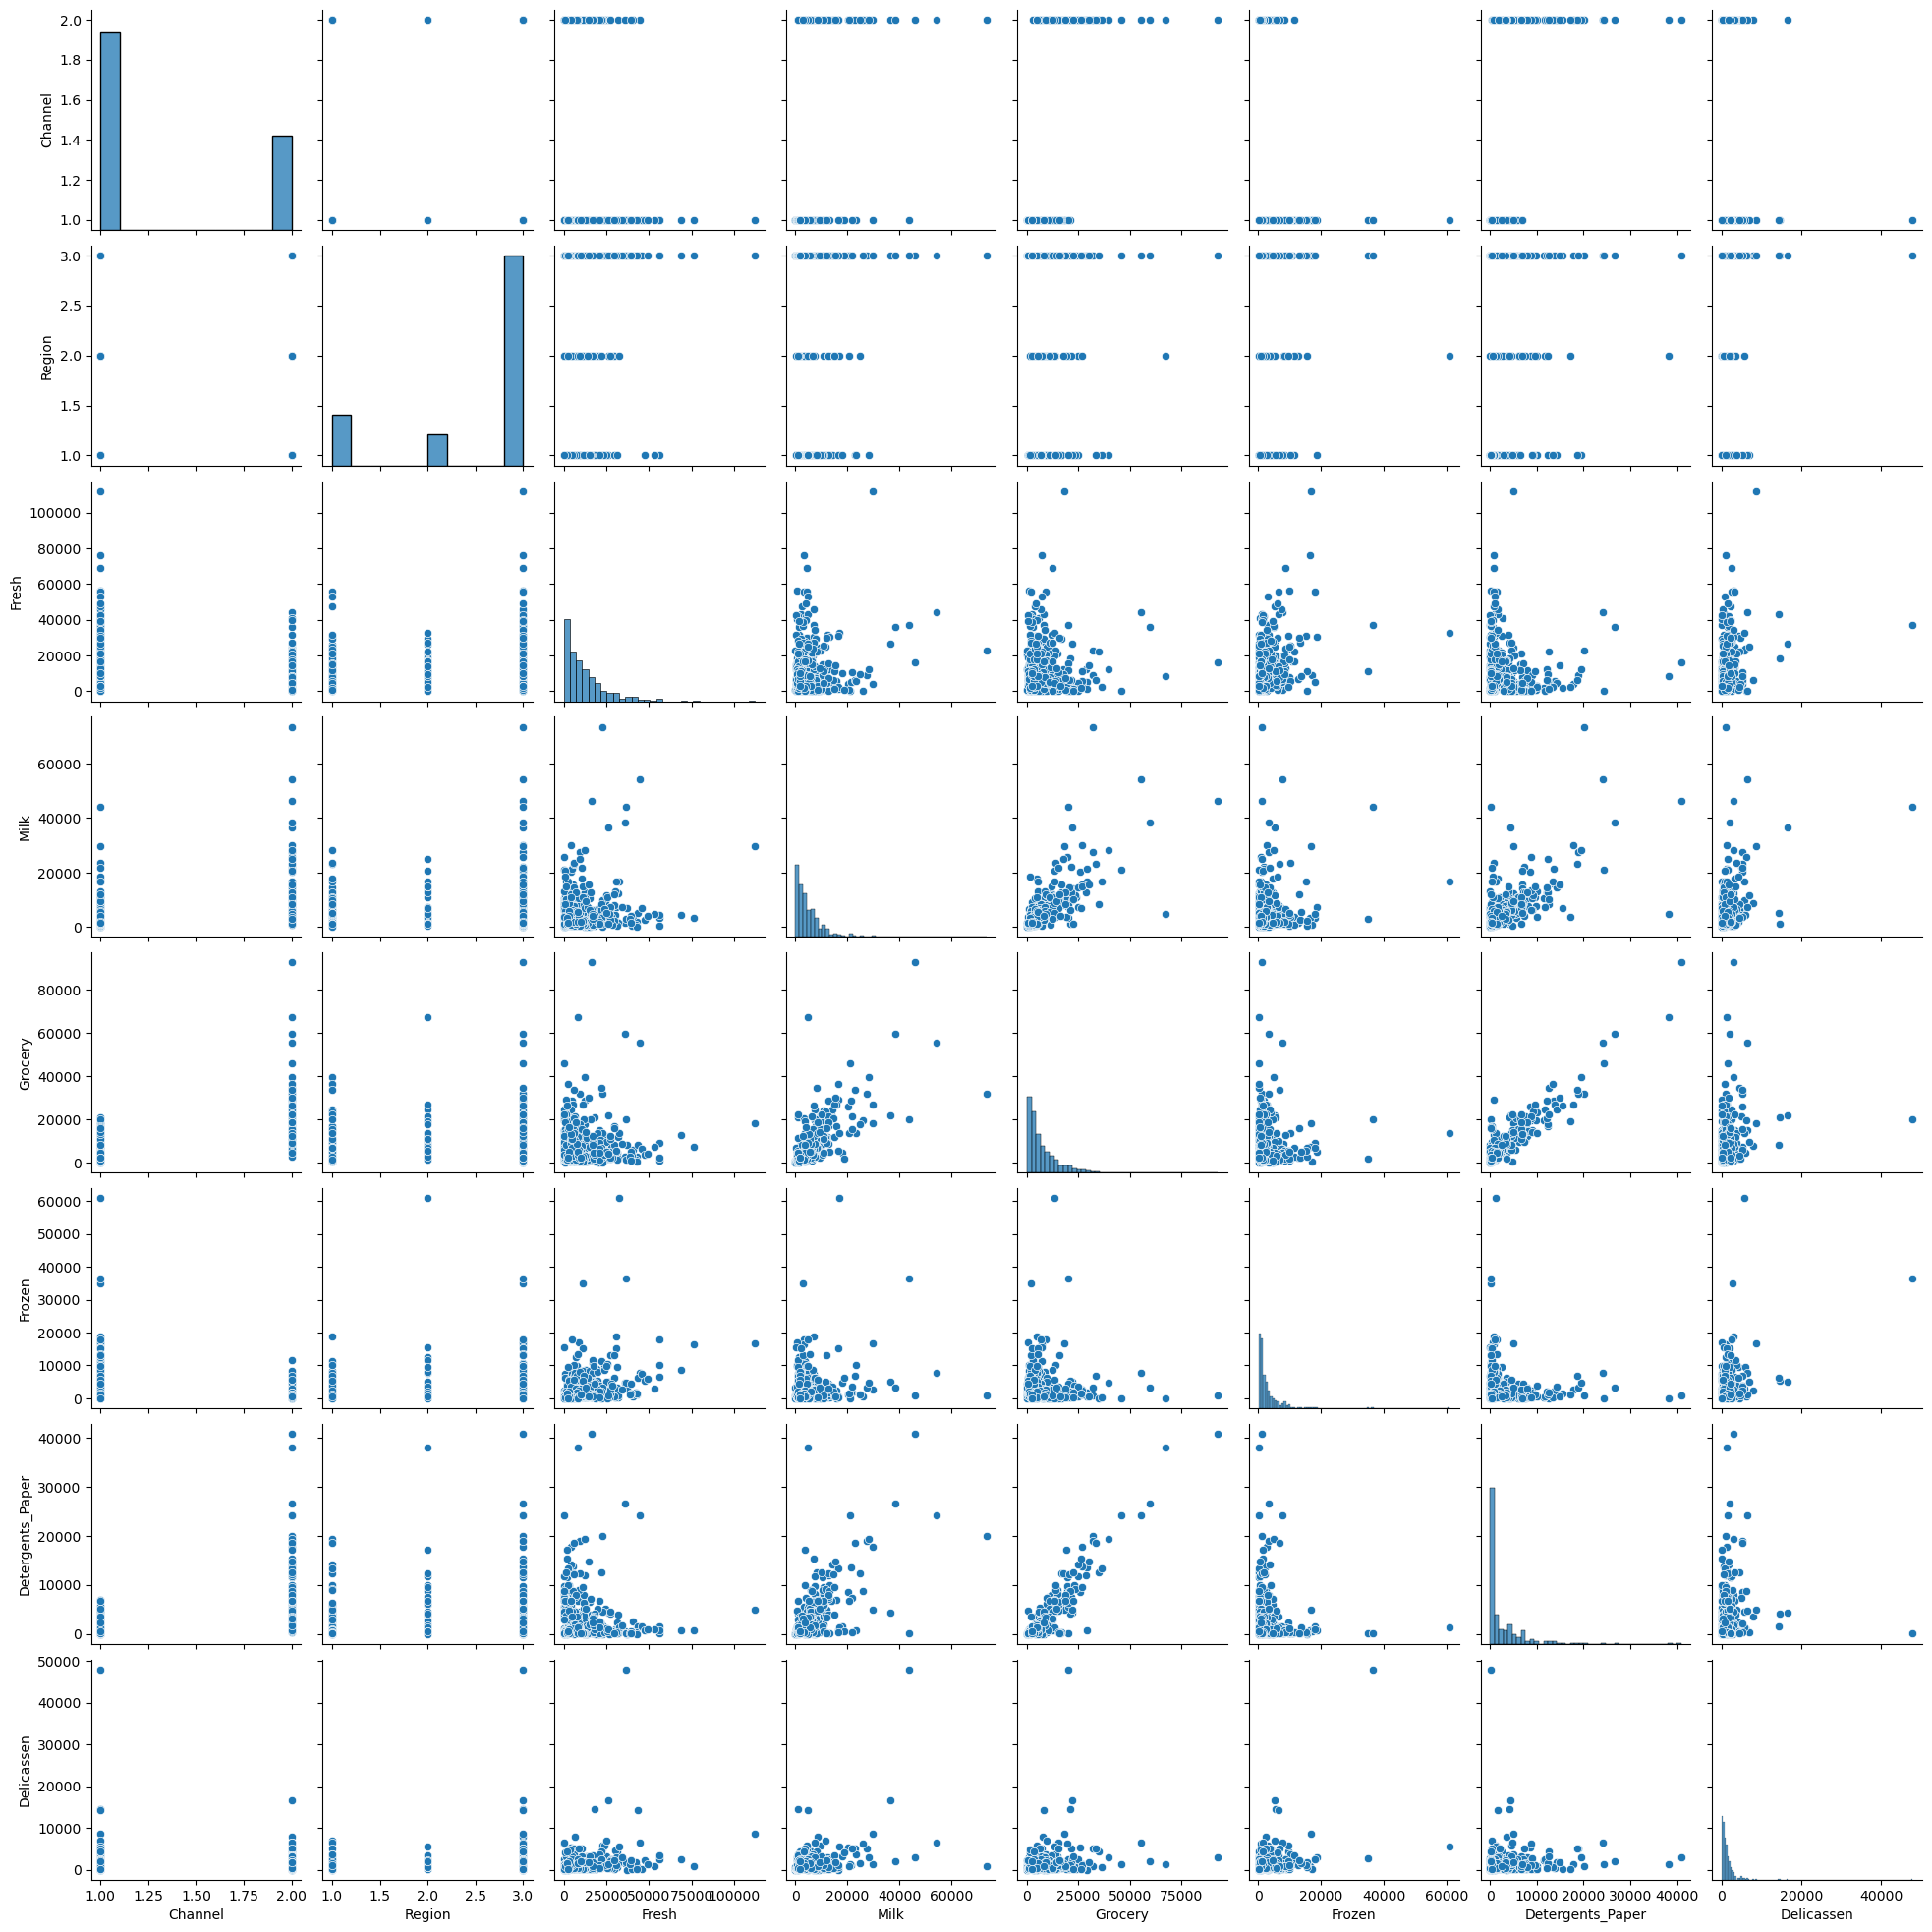

In [147]:
#散点图
sns.pairplot(data)
plt.show()

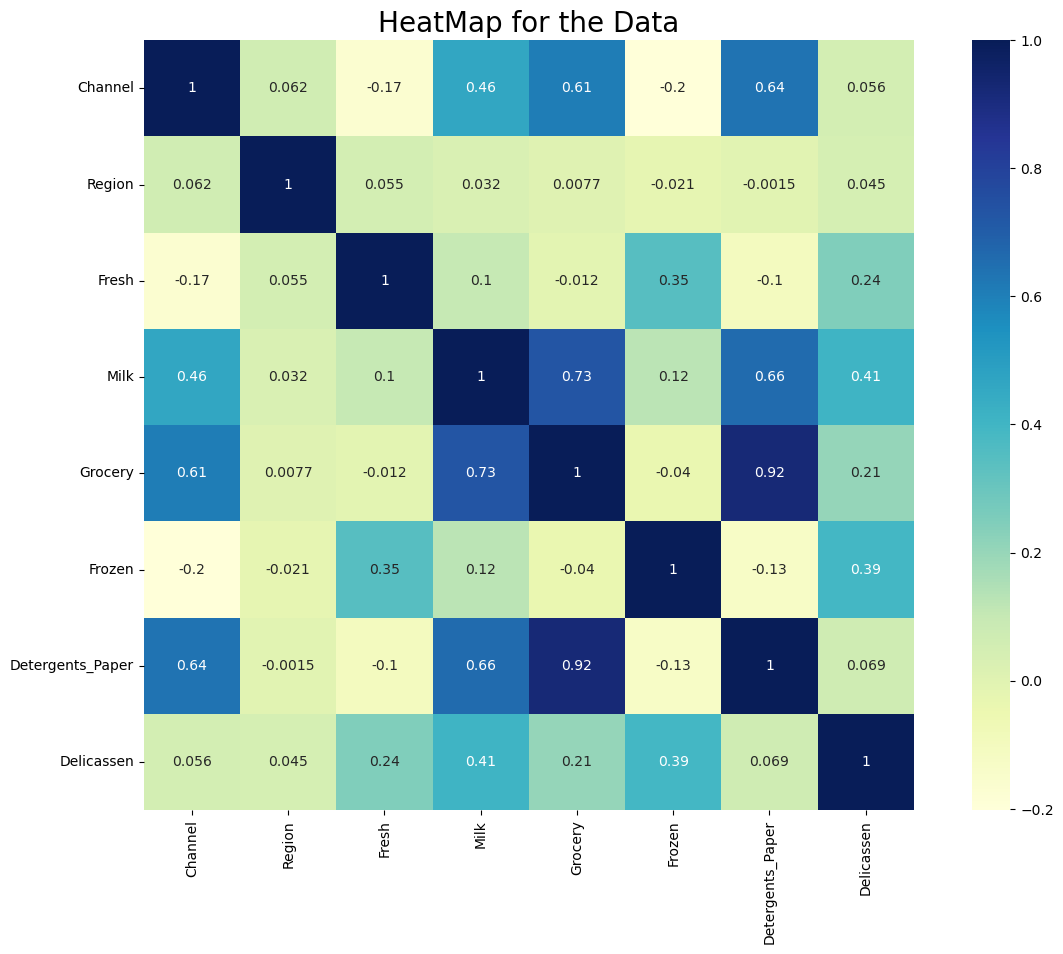

In [115]:
sns.heatmap(data.corr(),square=True,cmap='YlGnBu',annot=True)
plt.title("HeatMap for the Data",fontsize=20)
plt.show()

In [134]:
x = data.iloc[:,[2,3,4,5,6,7]]
X = data.iloc[:,[2,3,4,5,6,7]].values
# 标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data)


[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


In [117]:
#归一化
min_max_scaler = preprocessing.MinMaxScaler()
Kmeansdata_minmax = min_max_scaler.fit_transform(X)
print(Kmeansdata_minmax)

[[0.11294004 0.13072723 0.08146416 0.0031063  0.0654272  0.02784731]
 [0.06289903 0.13282409 0.10309667 0.02854842 0.08058985 0.03698373]
 [0.05662161 0.11918086 0.08278992 0.03911643 0.08605232 0.16355861]
 ...
 [0.1295431  0.21013575 0.32594285 0.00677142 0.36346267 0.03888194]
 [0.091727   0.02622442 0.02402535 0.01664914 0.00404174 0.04426366]
 [0.02482434 0.02237109 0.02702178 0.00065742 0.01161082 0.00102211]]


In [118]:
#获取data的特征
X = data.iloc[:,[2,3,4,5,6,7]].values

print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(440, 6)


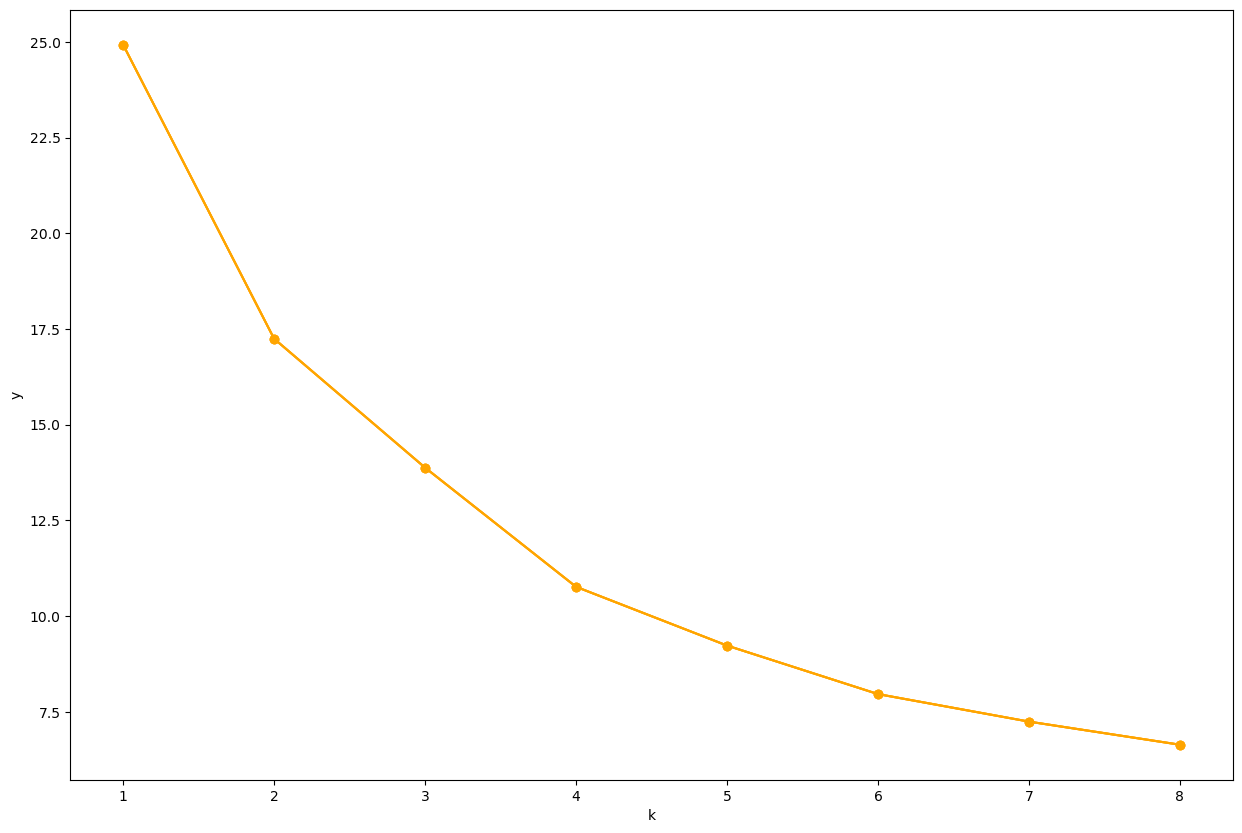

In [121]:
SSE = []
for k in range(1,9):
    clf=KMeans(n_clusters=k,random_state=42)
    clf.fit(Kmeansdata_minmax)
    SSE.append(clf.inertia_)

plt.xlabel('k')
plt.ylabel('y')
plt.plot(range(1,9),SSE,'o-',color='orange')
plt.show()

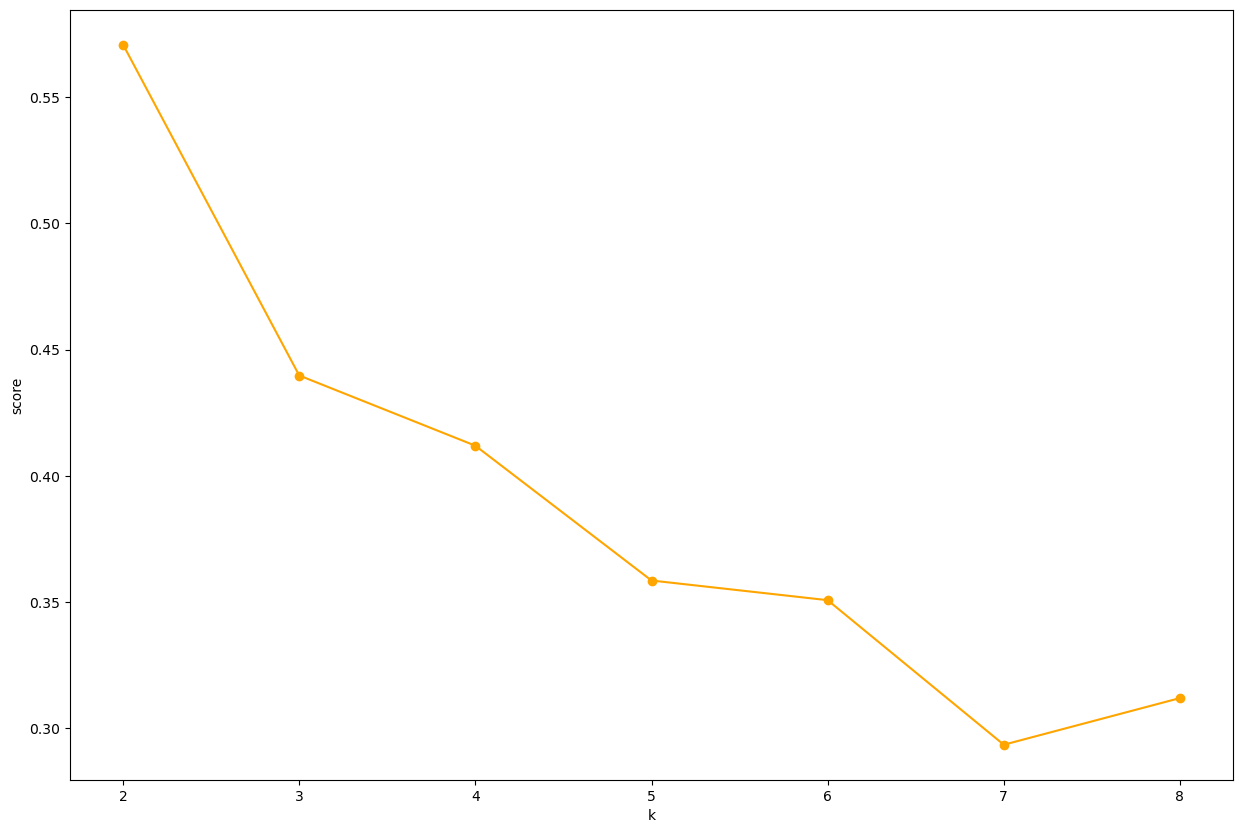

In [130]:
Scores = []
for k in range(2,9):
    clf=KMeans(n_clusters=k,random_state=42)
    clf.fit(Kmeansdata_minmax)
    Scores.append(silhouette_score(Kmeansdata_minmax,clf.labels_,metric='euclidean'))
    
plt.xlabel('k')
plt.ylabel('score')
plt.plot(range(2,9),Scores,'o-',color='orange')
plt.show()

In [144]:
#最优k = 4
clf=KMeans(n_clusters=4,random_state=42)
clf.fit(Kmeansdata_minmax)
Labels=clf.labels_
x['labels'] = Labels
x.head(20)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,3
5,9413,8259,5126,666,1795,1451,3
6,12126,3199,6975,480,3140,545,3
7,7579,4956,9426,1669,3321,2566,3
8,5963,3648,6192,425,1716,750,3
9,6006,11093,18881,1159,7425,2098,0


In [145]:
centers = x.groupby('labels').mean()
centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
0,5813.978495,10753.709677,17016.204301,1461.215054,7356.451613,1867.763441
1,38101.632653,6329.489796,6422.448980,8519.632653,971.857143,3317.346939
2,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
3,9419.451389,3100.805556,3874.951389,2665.795139,997.687500,1059.940972


In [146]:
x['labels'].value_counts()

3    288
0     93
1     49
2     10
Name: labels, dtype: int64